In [34]:
import numpy as np
import matplotlib.pyplot as plt
#load mdtraj
import mdtraj as md
import os
import MDAnalysis as mda
import MDAnalysis.analysis.rdf as rdf
import MDAnalysis.analysis.msd as msd
from MDAnalysis.analysis.msd import EinsteinMSD

In [2]:
# load the topology
# u = mda.Universe("Data/equil/kalj_T0.475_n360_v300_30000000_1.lammpstrj", "Data/prod/kalj_T0.475_n360_v300_prod_30000000_1.unwrap.dcd", topology_format="LAMMPSDUMP")
topol = 'Data/equil/kalj_T0.475_n360_v300_30000000_1.lammpstrj'

# load the data
traj_T0475 = mda.Universe(topol, "Data/prod/kalj_T0.475_n360_v300_prod_30000000_1.unwrap.dcd", topology_format="LAMMPSDUMP")
traj_T055 = mda.Universe(topol, "Data/prod/kalj_T0.55_n360_v300_prod_3000000_1.unwrap.dcd", topology_format="LAMMPSDUMP")
traj_T05 = mda.Universe(topol, "Data/prod/kalj_T0.5_n360_v300_prod_10000000_1.unwrap.dcd", topology_format="LAMMPSDUMP")
traj_T065 = mda.Universe(topol, "Data/prod/kalj_T0.65_n360_v300_prod_350000_1.unwrap.dcd", topology_format="LAMMPSDUMP")
traj_T06 = mda.Universe(topol, "Data/prod/kalj_T0.6_n360_v300_prod_1000000_1.unwrap.dcd", topology_format="LAMMPSDUMP")
traj_T06 = mda.Universe(topol, "Data/prod/kalj_T0.6_n360_v300_prod_1000000_1.unwrap.dcd", topology_format="LAMMPSDUMP")
traj_T07 = mda.Universe(topol, "Data/prod/kalj_T0.7_n360_v300_prod_180000_1.unwrap.dcd", topology_format="LAMMPSDUMP")
traj_T08 = mda.Universe(topol, "Data/prod/kalj_T0.8_n360_v300_prod_150000_1.unwrap.dcd", topology_format="LAMMPSDUMP")
traj_T09 = mda.Universe(topol, "Data/prod/kalj_T0.9_n360_v300_prod_150000_1.unwrap.dcd", topology_format="LAMMPSDUMP")
traj_T1 = mda.Universe(topol, "Data/prod/kalj_T1_n360_v300_prod_50000_1.unwrap.dcd", topology_format="LAMMPSDUMP")
traj_T15 = mda.Universe(topol, "Data/prod/kalj_T1.5_n360_v300_prod_10000_1.unwrap.dcd", topology_format="LAMMPSDUMP")


/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/topology/LAMMPSParser.py:631: UserWarning: Guessed all Masses to 1.0
  warnings.warn('Guessed all Masses to 1.0')


In [12]:
# create list of trajectories
traj_list = [traj_T0475, traj_T055, traj_T05, traj_T065, traj_T06, traj_T07, traj_T08, traj_T09, traj_T1, traj_T15]


# create empty lists to store rdf
rdf_1 = []
rdf_2 = []
rdf_1_2 = []

for i in traj_list:
    r1 = rdf.InterRDF(i.select_atoms('type 1'), i.select_atoms('type 1'), nbins=100, range=(0.0, 10.0))
    r2 = rdf.InterRDF(i.select_atoms('type 2'), i.select_atoms('type 2'), nbins=100, range=(0.0, 10.0))
    r3 = rdf.InterRDF(i.select_atoms('type 1'), i.select_atoms('type 2'), nbins=100, range=(0.0, 10.0))
    r1.run()
    r2.run()
    r3.run()
    rdf_1.append(r1)
    rdf_2.append(r2)
    rdf_1_2.append(r3)

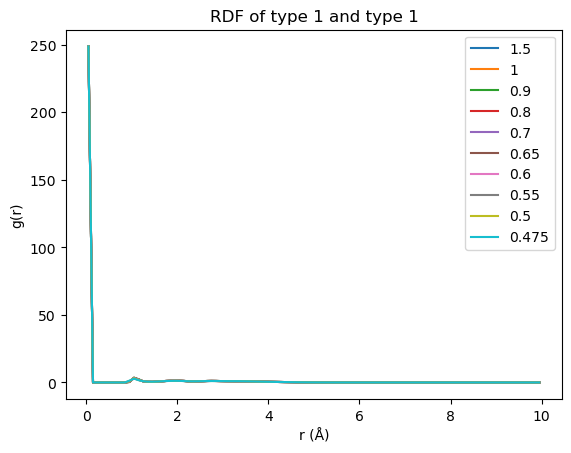

In [17]:
# plot the rdf between type 1 and type 1 for all files
temp_list=['1.5', '1', '0.9', '0.8', '0.7', '0.65', '0.6', '0.55', '0.5', '0.475']
for i in range(len(temp_list)):
    plt.plot(rdf_1[i].bins, rdf_1[i].rdf, label=temp_list[i])
plt.legend()
plt.xlabel('r (Å)')
plt.ylabel('g(r)')
plt.title('RDF of type 1 and type 1')
plt.show()

/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/rdf.py:316: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/rdf.py:324: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)


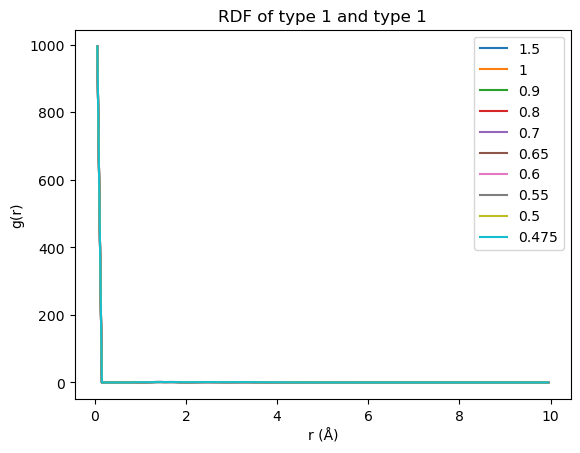

In [18]:
# plot the rdf between type 2 and type 2 for all files
temp_list=['1.5', '1', '0.9', '0.8', '0.7', '0.65', '0.6', '0.55', '0.5', '0.475']
for i in range(len(temp_list)):
    plt.plot(rdf_2[i].bins, rdf_2[i].rdf, label=temp_list[i])
plt.legend()
plt.xlabel('r (Å)')
plt.ylabel('g(r)')
plt.title('RDF of type 1 and type 1')
plt.show()

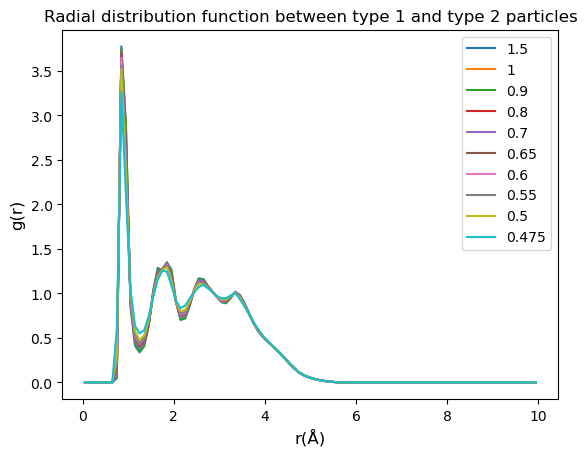

In [19]:
# plot the radial distribution function between type 1 and type 2 particles for all files
temp_list=['1.5', '1', '0.9', '0.8', '0.7', '0.65', '0.6', '0.55', '0.5', '0.475']
for i in range(len(temp_list)):
    plt.plot(rdf_1_2[i].bins, rdf_1_2[i].rdf, label=temp_list[i])
plt.legend()
plt.xlabel('r(Å)', fontsize=12)
plt.ylabel('g(r)', fontsize=12)
plt.title('Radial distribution function between type 1 and type 2 particles')
plt.savefig('RDF_1_2.png')

[<MDAnalysis.analysis.msd.EinsteinMSD object at 0x7fd25a9f4ee0>, <MDAnalysis.analysis.msd.EinsteinMSD object at 0x7fd2631b5d30>, <MDAnalysis.analysis.msd.EinsteinMSD object at 0x7fd25aa35d60>, <MDAnalysis.analysis.msd.EinsteinMSD object at 0x7fd25a9a3220>, <MDAnalysis.analysis.msd.EinsteinMSD object at 0x7fd25a99d8e0>, <MDAnalysis.analysis.msd.EinsteinMSD object at 0x7fd25a99d940>, <MDAnalysis.analysis.msd.EinsteinMSD object at 0x7fd25a9829a0>, <MDAnalysis.analysis.msd.EinsteinMSD object at 0x7fd25a98e760>, <MDAnalysis.analysis.msd.EinsteinMSD object at 0x7fd25a98efa0>, <MDAnalysis.analysis.msd.EinsteinMSD object at 0x7fd25a9d29a0>]


Text(0.5, 1.0, 'Mean square displacement of type 1 particles')

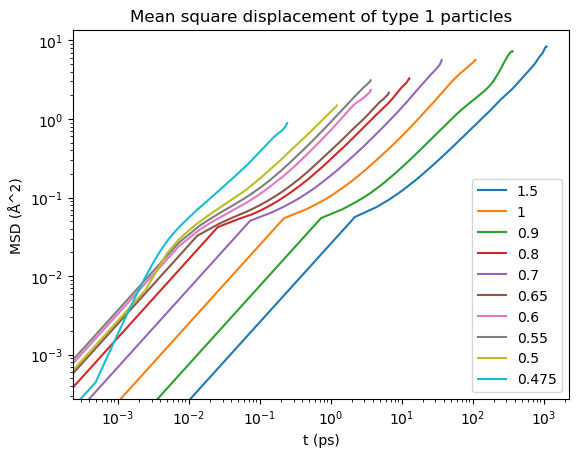

In [49]:
# compute mean square displacement for all type 1 particles at each temperature
msd_all =[]
for i in traj_list:
    msd_1 = msd.EinsteinMSD(i, select='type 1')
    msd_1.run()
    msd_all.append(msd_1)

print(msd_all)
for i, msd_result in enumerate(msd_all):
    plt.loglog(msd_result.times, msd_result.results.timeseries, label=temp_list[i])
plt.legend()
plt.xlabel('t (ps)')
plt.ylabel('MSD (Å^2)')
plt.title('Mean square displacement of type 1 particles')
    


[<MDAnalysis.analysis.msd.EinsteinMSD object at 0x7fd25a9f4ee0>, <MDAnalysis.analysis.msd.EinsteinMSD object at 0x7fd2631b5d30>, <MDAnalysis.analysis.msd.EinsteinMSD object at 0x7fd25aa35d60>, <MDAnalysis.analysis.msd.EinsteinMSD object at 0x7fd25a9a3220>, <MDAnalysis.analysis.msd.EinsteinMSD object at 0x7fd25a99d8e0>, <MDAnalysis.analysis.msd.EinsteinMSD object at 0x7fd25a99d940>, <MDAnalysis.analysis.msd.EinsteinMSD object at 0x7fd25a9829a0>, <MDAnalysis.analysis.msd.EinsteinMSD object at 0x7fd25a98e760>, <MDAnalysis.analysis.msd.EinsteinMSD object at 0x7fd25a98efa0>, <MDAnalysis.analysis.msd.EinsteinMSD object at 0x7fd25a9d29a0>]
[131.99816814737346, 17.159761859158554, 49.865974633452204, 3.7986139500188587, 7.113234616830681, 2.930359332871691, 1.400647283027173, 1.0999847772464708, 0.7919890396174591, 0.2444410616103269]


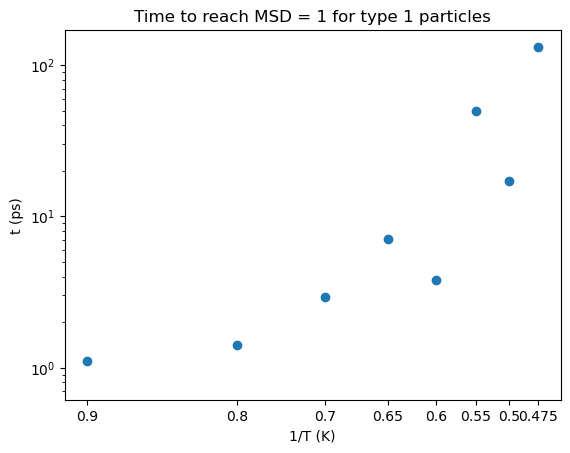

In [59]:
# find time where MSD = 1 for each temperature
time_1 = []
print(msd_all)
for i, msd_result in enumerate(msd_all):
   time_1.append(msd_result.times[np.where(msd_result.results.timeseries < 1)[0][-1]])
print(time_1)
time_1.reverse()
plt.loglog(np.array(temp_list[1:]), time_1[1:], 'o')
plt.xlabel('1/T (K)')
plt.ylabel('t (ps)')
plt.title('Time to reach MSD = 1 for type 1 particles')
plt.show()
